This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray RADOLAN backend

In this example, we read RADOLAN data files using the xarray `radolan` backend.

In [1]:
import glob
import os
import wradlib as wrl
import wradlib_data
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load RADOLAN Data

In [2]:
fpath = "radolan/misc/raa01-rw_10000-1408030950-dwd---bin.gz"
f = wradlib_data.DATASETS.fetch(fpath)
comp = wrl.io.open_radolan_dataset(f)

## Inspect Data

In [3]:
display(comp)

<xarray.Dataset> Size: 3MB
Dimensions:  (y: 900, x: 900, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 8B 2014-08-03T09:50:00
  * y        (y) float64 7kB -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 7kB -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    RW       (y, x) float32 3MB ...
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.13.1
    radarlocations:  ['boo', 'ros', 'emd', 'hnr', 'pro', 'ess', 'asd', 'neu',...

## Inspect RADOLAN moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset.

In [4]:
display(comp.RW)

<xarray.DataArray 'RW' (y: 900, x: 900)> Size: 3MB
[810000 values with dtype=float32]
Coordinates:
  * y        (y) float64 7kB -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 7kB -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Attributes:
    valid_min:      0
    valid_max:      4095
    standard_name:  rainfall_rate
    long_name:      RW
    unit:           mm h-1

## Create simple plot

Using xarray features a simple plot can be created like this.

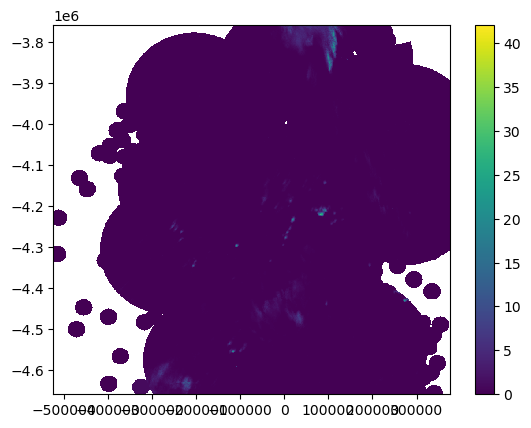

In [5]:
comp.RW.plot(x="x", y="y", add_labels=False)

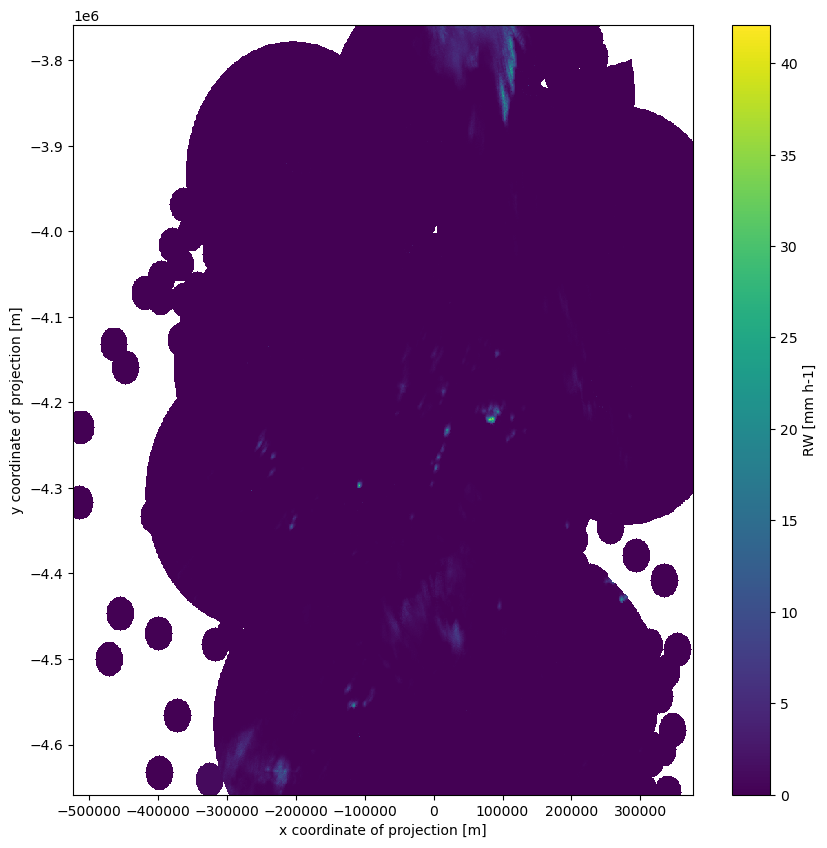

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
comp.RW.plot(x="x", y="y", ax=ax)

## Mask some values

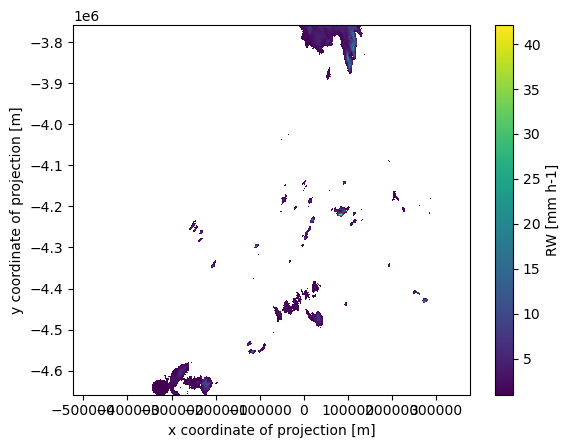

In [7]:
ds = comp["RW"].where(comp["RW"] >= 1)
ds.plot()

## Use `xr.open_dataset`


In [8]:
comp2 = xr.open_dataset(f, engine="radolan")
display(comp2)

<xarray.Dataset> Size: 3MB
Dimensions:  (y: 900, x: 900, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 8B 2014-08-03T09:50:00
  * y        (y) float64 7kB -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 7kB -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    RW       (y, x) float32 3MB ...
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.13.1
    radarlocations:  ['boo', 'ros', 'emd', 'hnr', 'pro', 'ess', 'asd', 'neu',...

## Use `xr.open_mfdataset` to retrieve timeseries

In [9]:
flist = [
    "radolan/misc/raa01-sf_10000-1305270050-dwd---bin.gz",
    "radolan/misc/raa01-sf_10000-1305280050-dwd---bin.gz",
]
flist = [wradlib_data.DATASETS.fetch(f) for f in flist]

In [10]:
comp3 = xr.open_mfdataset(flist, engine="radolan")
display(comp3)

<xarray.Dataset> Size: 6MB
Dimensions:  (time: 2, y: 900, x: 900)
Coordinates:
  * time     (time) datetime64[ns] 16B 2013-05-27T00:50:00 2013-05-28T00:50:00
  * y        (y) float64 7kB -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 7kB -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    SF       (time, y, x) float32 6MB dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.12.0
    radarlocations:  ['ham', 'ros', 'emd', 'han', 'bln', 'ess', 'fld', 'drs',...
    radardays:       ['bln 24', 'drs 24', 'eis 24', 'emd 24', 'ess 24', 'fld ...